# SPAM Email

## Import packages

In [32]:
import pandas as pd
import numpy as np

import seaborn as sn
import matplotlib.pyplot as plt

from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC
from sklearn.svm import SVC

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix, f1_score

## Data Reading

In [2]:
data = pd.read_csv("/Users/isa/Desktop/SpamEmail/spam_ham_dataset.csv", header=0)
data = data.drop('Unnamed: 0', axis=1)
#data = data.drop('label_num', axis=1)

In [3]:
data.head()
data_cp = data.copy()

In [4]:
data.isnull().sum()

label        0
text         0
label_num    0
dtype: int64

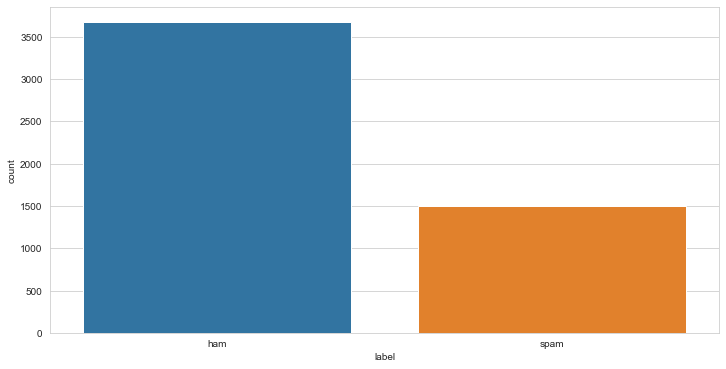

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

plt.figure(figsize = (12, 6))
sns.countplot(data = data, x = 'label');

In [6]:
data_cp["label"]=data_cp["label"].map({'spam':1,'ham':0})

In [7]:
data_cp['label'].head()

0    0
1    0
2    0
3    1
4    0
Name: label, dtype: int64

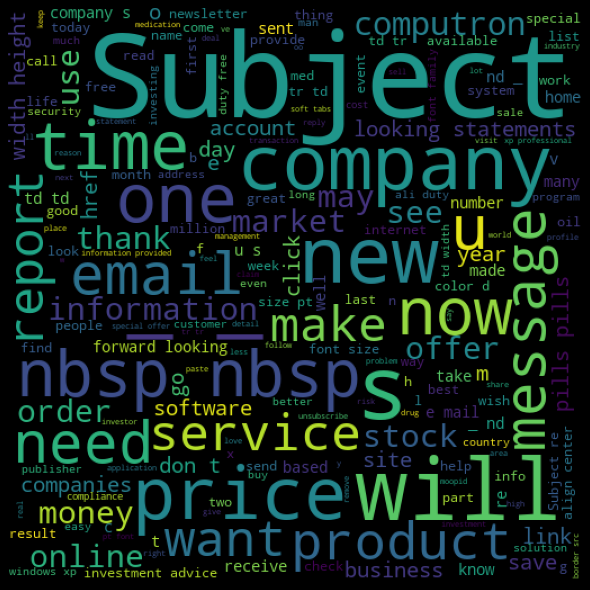

In [8]:
#spam maillerde en çok geçen kelimeler wordcloud ile görselleştirildi.
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)
spam_words=' '.join(list(data_cp[data_cp['label']==1]['text'])) 
spam_wc=WordCloud(width=512,height=512).generate(spam_words) 
plt.figure(figsize=(10,8),facecolor='k')
plt.imshow(spam_wc)
plt.axis('off') 
plt.tight_layout(pad=0) 
plt.show()

## MLOPS

In [33]:
X = data['text']
y = data['label_num']

In [46]:
linear_svc = Pipeline([('vectorizer', CountVectorizer()), ('classifier', LinearSVC())])

logistic_reg = Pipeline([
    ('tfid', TfidfVectorizer()),
    ('lr', LogisticRegression())
])

#### Data Split

In [47]:
x_train, x_test, y_train, y_test = train_test_split(X, y,test_size=0.4, random_state=42)

In [48]:
x_train.head()

1774    Subject: usb charset = us - ascii " >\r\nexter...
3547    Subject: re : spinnaker exploration company , ...
4759    Subject: re : info you requested wo 470\r\nlt ...
3973    Subject: revision : eastrans nomination change...
2654    Subject: re : swing and buybacks\r\nthe buybac...
Name: text, dtype: object

In [49]:
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score,roc_auc_score
linear_svc.fit(x_train, y_train)
print(classification_report(y_test, linear_svc.predict(x_test)))
confusion_matrix(y_test, linear_svc.predict(x_test))
y_pred = linear_svc.predict(x_test)
print("Recall: ",recall_score(y_test, y_pred, average='micro'))
print("Precision: "+str(precision_score(y_test,y_pred, average='micro')))
print("F1 Puanı: "+str(precision_score(y_test,y_pred, average='micro')))
cm = confusion_matrix(y_test, y_pred)
print(cm)

              precision    recall  f1-score   support

           0       0.98      0.97      0.98      1507
           1       0.93      0.95      0.94       562

    accuracy                           0.97      2069
   macro avg       0.95      0.96      0.96      2069
weighted avg       0.97      0.97      0.97      2069

Recall:  0.9666505558240696
Precision: 0.9666505558240696
F1 Puanı: 0.9666505558240696
[[1464   43]
 [  26  536]]


In [50]:
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score,roc_auc_score
logistic_reg.fit(x_train, y_train)
print(classification_report(y_test, logistic_reg.predict(x_test)))
confusion_matrix(y_test, logistic_reg.predict(x_test))
y_pred = linear_svc.predict(x_test)
print("Recall: ",recall_score(y_test, y_pred, average='micro'))
print("Precision: "+str(precision_score(y_test,y_pred, average='micro')))
print("F1 Puanı: "+str(precision_score(y_test,y_pred, average='micro')))
cm = confusion_matrix(y_test, y_pred)
print(cm)

              precision    recall  f1-score   support

           0       0.99      0.98      0.99      1507
           1       0.96      0.97      0.97       562

    accuracy                           0.98      2069
   macro avg       0.97      0.98      0.98      2069
weighted avg       0.98      0.98      0.98      2069

Recall:  0.9666505558240696
Precision: 0.9666505558240696
F1 Puanı: 0.9666505558240696
[[1464   43]
 [  26  536]]


In [51]:
#naive_bayes = GaussianNB()
#naive_bayes.fit(x_train, y_train)
#print(classification_report(y_test, naive_bayes.predict(x_test)))
#confusion_matrix(y_test, naive_bayes.predict(x_test))

### ROC

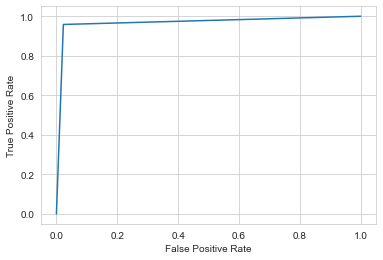

In [16]:
from sklearn import metrics
import matplotlib.pyplot as plt
fpr, tpr, _ = metrics.roc_curve(y_test,  linear_svc.predict(x_test))

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### Cross Validation Fold

In [17]:
k_fold = KFold(n_splits=6)
scores = []
confusion = np.array([[0, 0], [0, 0]])
for train_indices, test_indices in k_fold.split(data):
    train_text = data.iloc[train_indices]['text'].values
    train_y = data.iloc[train_indices]['label'].values

    test_text = data.iloc[test_indices]['text'].values
    test_y = data.iloc[test_indices]['label'].values

    linear_svc.fit(train_text, train_y)
    predictions = linear_svc.predict(test_text)

    confusion += confusion_matrix(test_y, predictions)
    score = f1_score(test_y, predictions, pos_label='spam')
    scores.append(score)

print('Total emails classified:', len(data))
print('Score:', sum(scores)/len(scores))
print('Confusion matrix:')
print(confusion)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Total emails classified: 5171
Score: 0.9473326820760332
Confusion matrix:
[[3577   95]
 [  65 1434]]


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


## ANN 